# Create a sale data analysis of any commercial store

In [5]:
import pandas as pd

# Retail Dataset

In [7]:
data = pd.read_csv(r'C:\Users\hemak\Downloads\retail_sales_dataset.csv')

## Dataset Overview

In [8]:
data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [10]:
data.shape

(1000, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [12]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Total Sales

In [14]:
total_sales = data['Total Amount'].sum()
print(f"Total Sales: ₹{total_sales:.2f}")

Total Sales: ₹456000.00


#### Category Sales

In [15]:
category_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(category_sales)

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


#### Gender Sales

In [16]:
gender_sales = data.groupby('Gender')['Total Amount'].sum()
print(gender_sales)

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


##### Top Products

In [17]:
top_products = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print(top_products)

Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


##### Correlation

In [18]:
correlation = data[['Price per Unit', 'Quantity']].corr()
print(correlation)

                Price per Unit  Quantity
Price per Unit        1.000000  0.017501
Quantity              0.017501  1.000000


##### Monthly Sales Trend

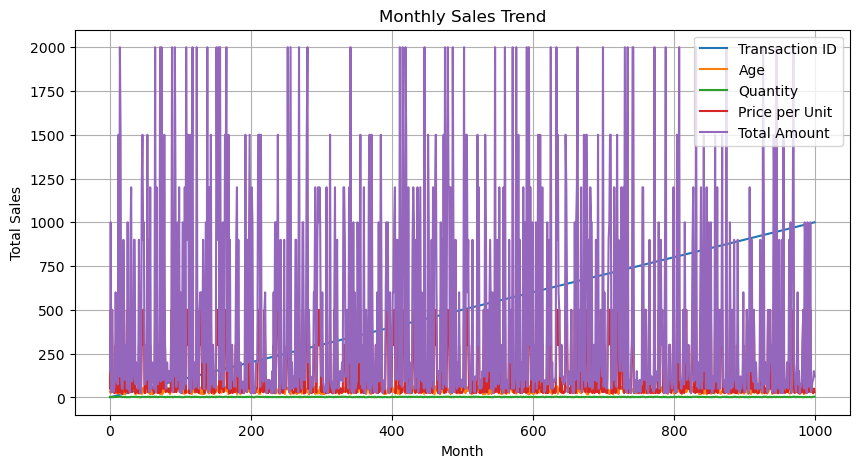

In [19]:
import matplotlib.pyplot as plt

data.plot(kind='line', figsize=(10, 5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### Top Selling Products by Total Sales

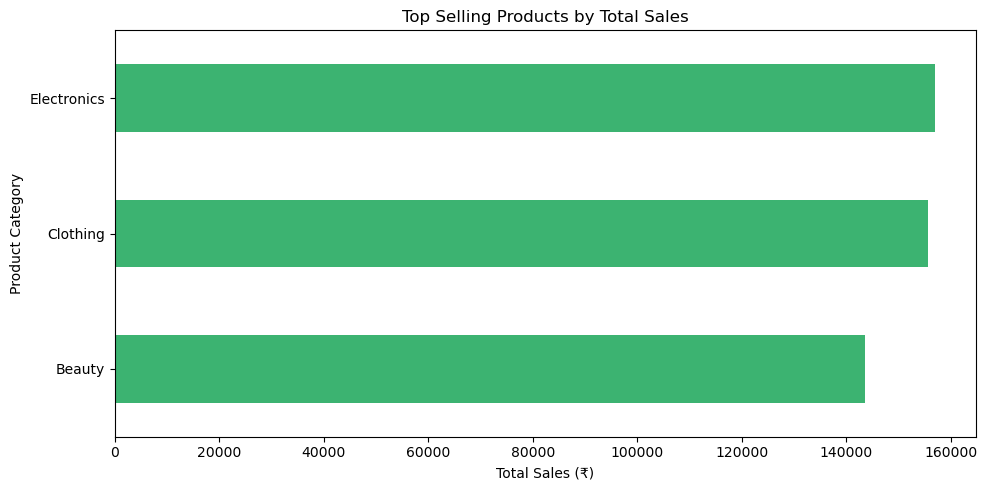

In [20]:
top_products_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values()

plt.figure(figsize=(10, 5))
top_products_sales.plot(kind='barh', color='mediumseagreen')
plt.title("Top Selling Products by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


#### Top Selling products by Quantity

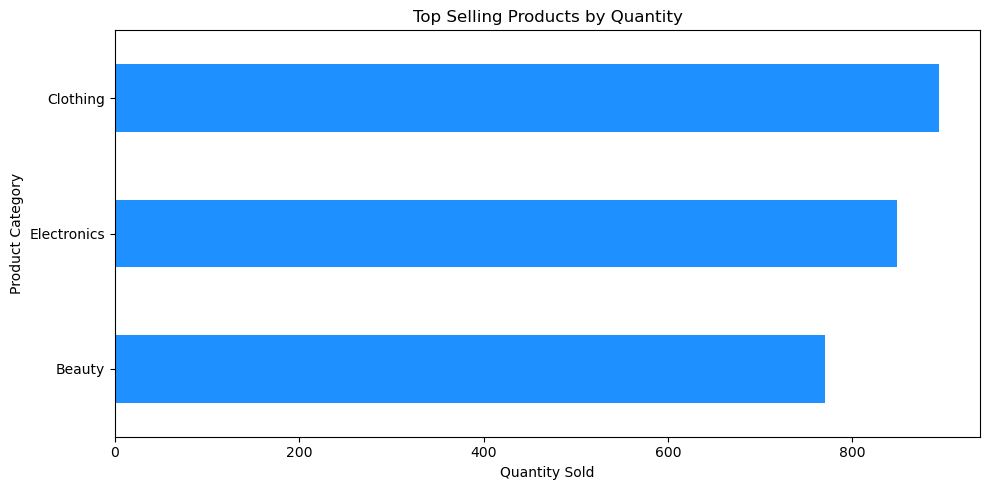

In [21]:
top_products_qty = data.groupby('Product Category')['Quantity'].sum().sort_values()

plt.figure(figsize=(10, 5))
top_products_qty.plot(kind='barh', color='dodgerblue')
plt.title("Top Selling Products by Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


#### Quantity Vs Price Per Unit

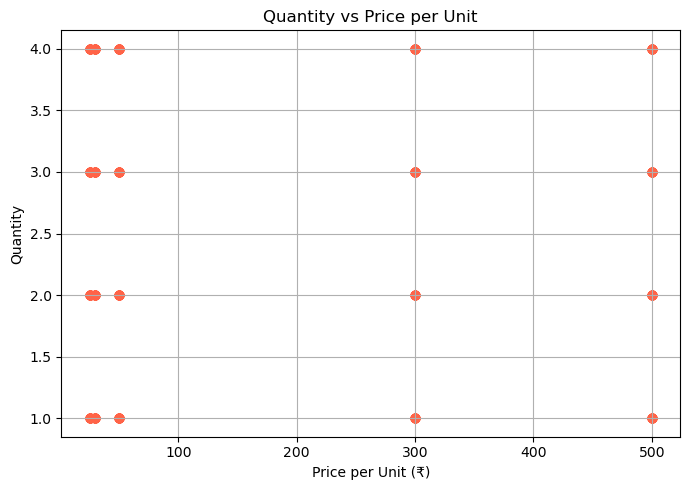

In [23]:
plt.figure(figsize=(7, 5))
plt.scatter(data['Price per Unit'], data['Quantity'], color='tomato', alpha=0.6)
plt.title("Quantity vs Price per Unit")
plt.xlabel("Price per Unit (₹)")
plt.ylabel("Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Total sales by Gender

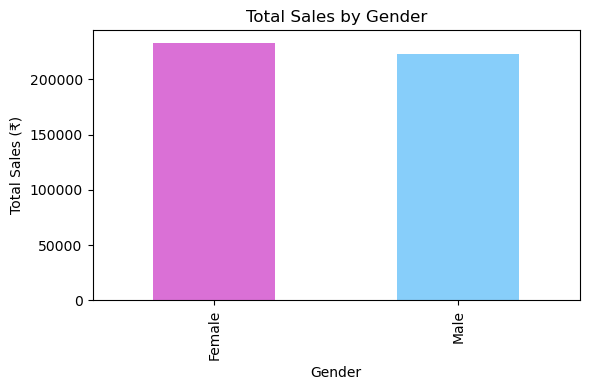

In [24]:
gender_sales = data.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(6, 4))
gender_sales.plot(kind='bar', color=['orchid', 'lightskyblue'])
plt.title("Total Sales by Gender")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()
